In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12, 8)

import seaborn as sns

from astropy.io import fits

In [3]:
tb = fits.open("../data/P200+55_table_100.fits")

In [4]:
dat = fits.open("../data/P200+55-mosaic.fits")[0]
dat

In [5]:
(~np.isnan(dat.data)).sum(), (np.isnan(dat.data)).sum()

(58928339, 16101905)

In [6]:
tb.info()

Filename: ../data/P200+55_table_100.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   ()      
  1                1 BinTableHDU    454   55R x 119C   [22A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 1A, 7A, D, J, 27A, D, D, D, D, D, D, D, D, D, 4A, 19A, 4A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 4A, 1A, D, 4A, 23A, I, D, I, D, D, D, D, D, D, D, D, D, D, D, D, D, D]   


In [7]:
dat.data.shape

(8662, 8662)

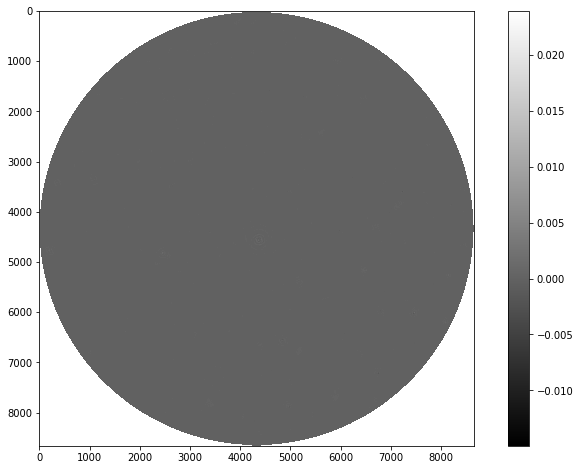

In [8]:
plt.imshow(dat.data, cmap="gray")
plt.colorbar();

In [9]:
d = np.nan_to_num(dat.data, 0.0)

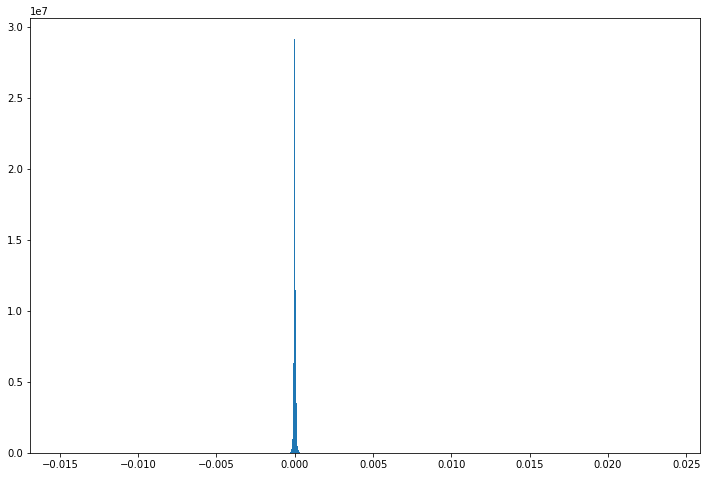

In [10]:
NBINS = 1000
plt.hist(dat.data.flatten(), NBINS);

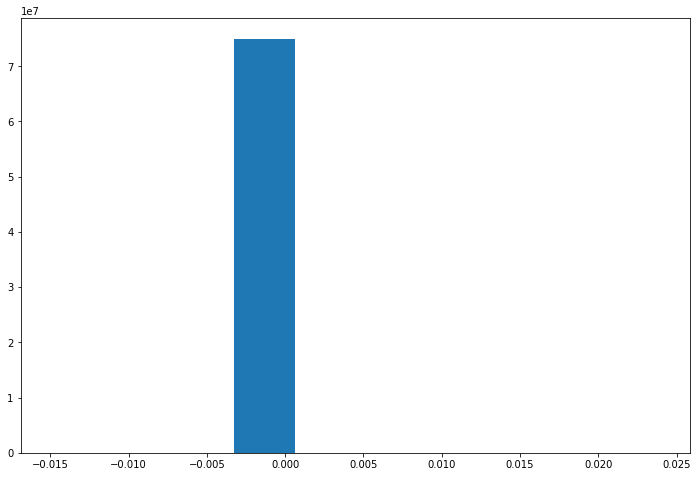

In [11]:
plt.hist(d.flatten());

In [12]:
def calc_pixel_indices_above_n_sigma(n, data):
    sd = data.flatten().std()
    points_of_interest = (np.abs(data) > n * sd)
    return np.where(points_of_interest)

In [16]:
def plot_interesting_area(i, size, indices_of_interest, cmap="gray"):
    margin = size // 2
    index = indices_of_interest[0][i], indices_of_interest[1][i]
    
    vl, vu = np.max([0, index[0] - margin]), np.min([d.shape[0] - 1, index[0] + margin])
    hl, hu = np.max([0, index[1] - margin]), np.min([d.shape[1] - 1, index[1] + margin])
    
    dsub = d[vl:vu, hl:hu]
    plt.imshow(dsub, cmap=cmap)
    plt.colorbar();    

In [17]:
ioi = calc_pixel_indices_above_n_sigma(5, d)

In [30]:
d[20:30, 20:30]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

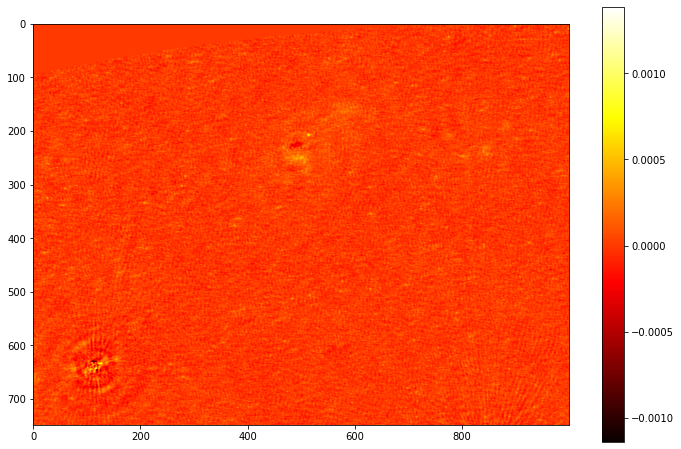

In [26]:
plot_interesting_area(52, 1000, ioi, "hot")

In [ ]:
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

In [ ]:
ob = tb[1].data[0]

In [ ]:
tb[1].header

In [ ]:
h = tb[0]

In [ ]:
print(h.header)

In [ ]:
ob

In [35]:
print(repr(dat.header))

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8662                                                  
NAXIS2  =                 8662                                                  
WCSAXES =                    2                                                  
CTYPE1  = 'RA---SIN'                                                            
CTYPE2  = 'DEC--SIN'                                                            
CUNIT1  = 'deg     '                                                            
CUNIT2  = 'deg     '                                                            
CRPIX1  =                 4331                                                  
CRPIX2  =                 4331                                                  
CRVAL1  =          200.55333